In [6]:
import pandas as pd

# Load the dataset using the provided format
df_can = pd.read_csv('Canada.csv')
df_can.set_index('Unnamed: 0', inplace=True)
df_can.index.name = None

# Display the first few rows of the dataset
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df_can.shape

(195, 38)

# Dataset Overview

The dataset provides information on the number of immigrants from various countries to Canada over the years 1980 to 2013. The columns in the dataset are:

- **Continent**: The continent from which the immigrants are coming.
- **Region**: The specific region within that continent.
- **DevName**: Whether the country is a developing or developed region.
- **1980-2013**: The number of immigrants for each year.
- **Total**: The total number of immigrants over all the years.

## Visualizations

To gain a better understanding of the dataset, let's start by creating some visualizations.

**1. Total Immigrants by Continent**: We'll create a bar chart showing the total number of immigrants from each continent over the years 1980 to 2013.

**2. Top Countries by Total Immigrants**: We'll display the top 10 countries by the total number of immigrants to Canada over the years.

**3. Immigration Trend for Specific Countries**: We'll plot the trend of immigrants for specific countries over the years.

**4. Distribution by Development Status**: A pie chart showing the distribution of immigrants based on whether they come from developing or developed regions.

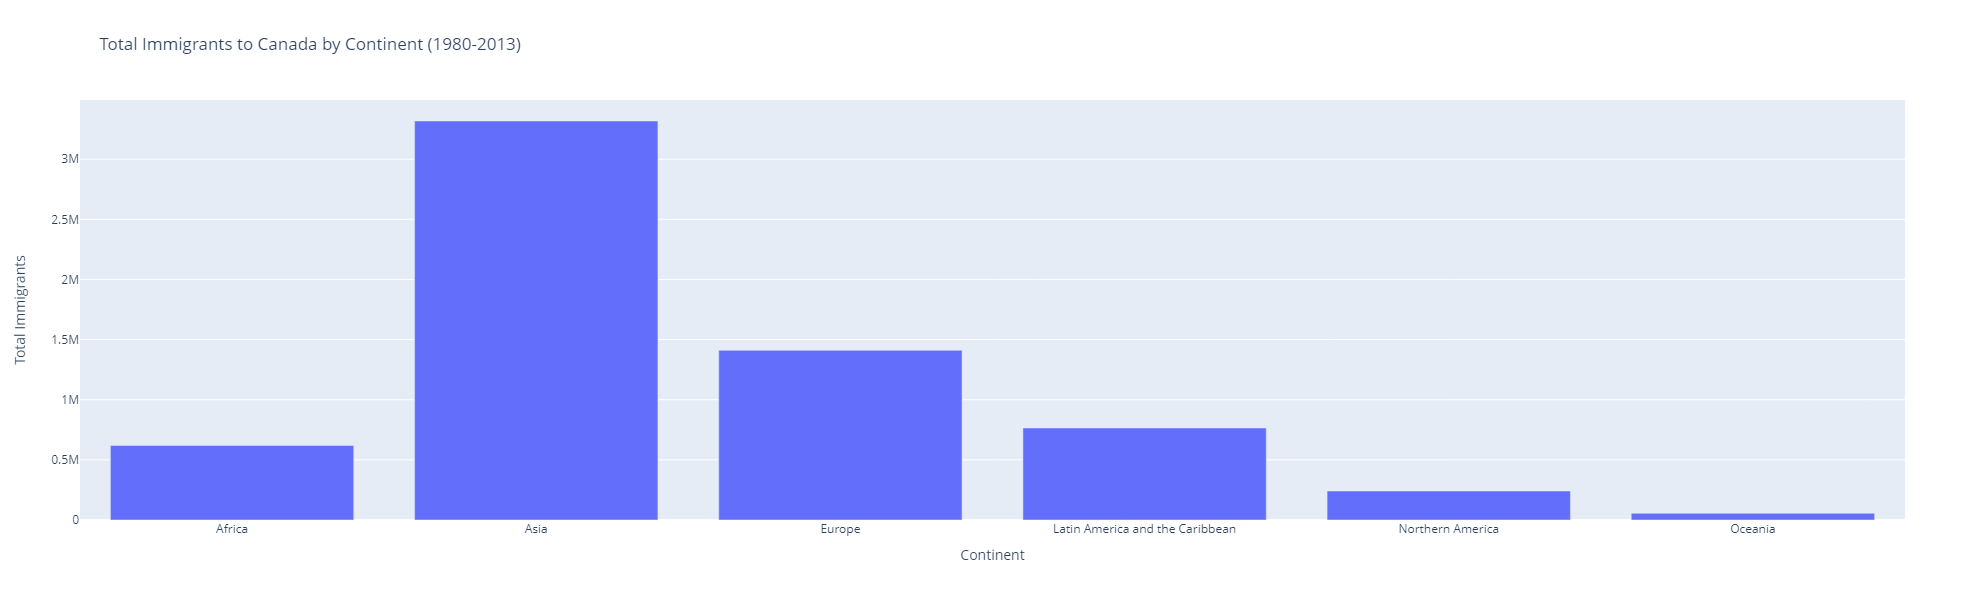

In [4]:
import plotly.express as px
import plotly.graph_objects as go

# Group data by Continent and sum the totals
df_continent = df_can.groupby('Continent').sum()['Total']

# Create a bar chart for total immigrants by Continent
fig_continent = px.bar(df_continent, 
                       x=df_continent.index, 
                       y=df_continent.values, 
                       labels={'y': 'Total Immigrants', 'index': 'Continent'},
                       title='Total Immigrants to Canada by Continent (1980-2013)')

# Update layout to adjust figure size
fig_continent.update_layout(width=1000, height=600)

fig_continent.show()


Let's move on to the next visualization: Top 10 Countries by Total Immigrants.

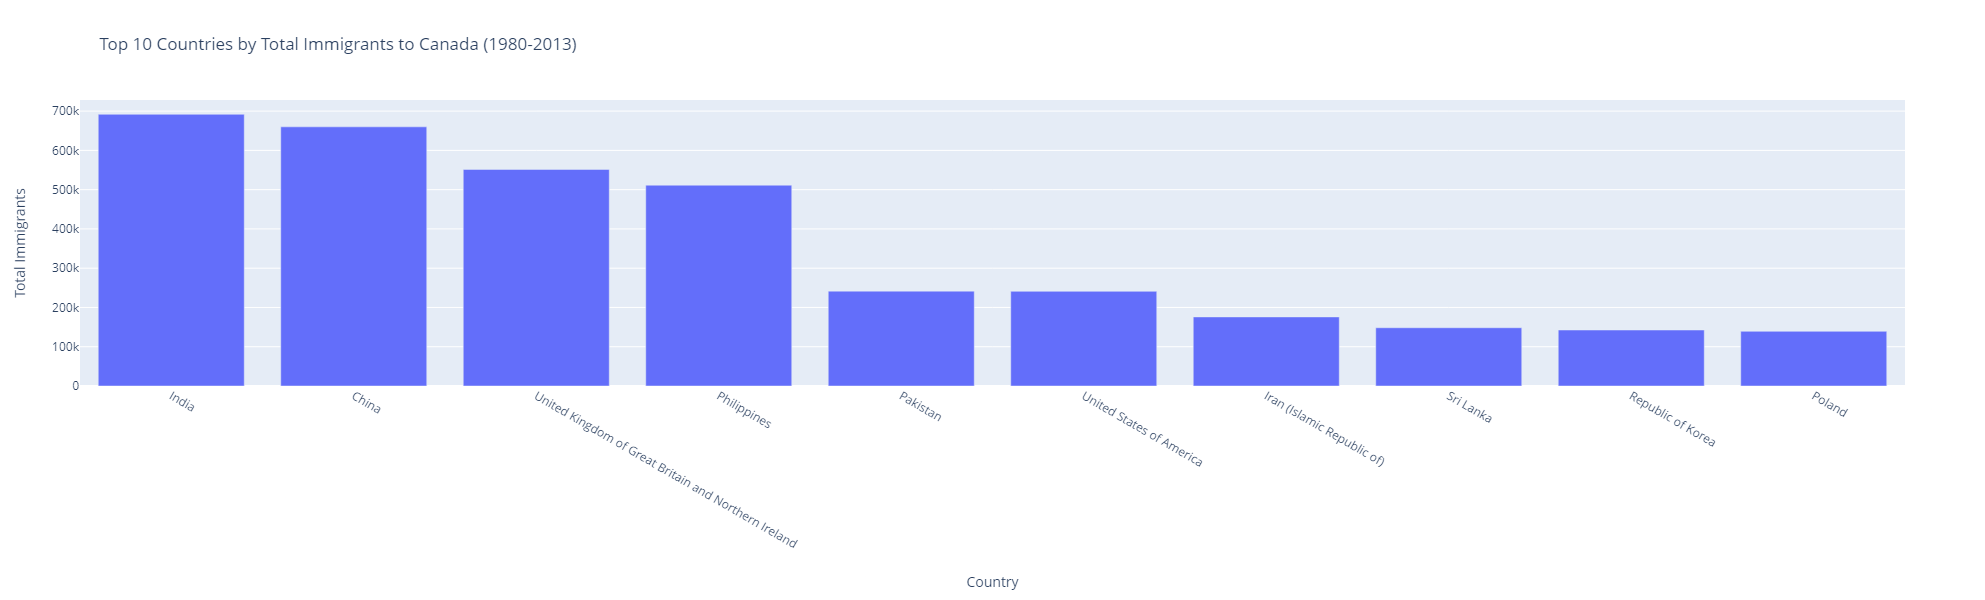

In [80]:
# Get top 10 countries by total immigrants
df_top10_countries = df_can.sort_values(by='Total', ascending=False).head(10)

# Create a bar chart for top 10 countries by total immigrants
fig_top10_countries = px.bar(df_top10_countries, 
                             x=df_top10_countries.index, 
                             y='Total', 
                             labels={'Total': 'Total Immigrants', 'index': 'Country'},
                             title='Top 10 Countries by Total Immigrants to Canada (1980-2013)')

fig_top10_countries.update_layout(width=1000, height=600)

fig_top10_countries


In [81]:
# Get top 5 countries by total immigrants
years = list(map(str, range(1980, 2014)))

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

 # get the top 5 entries
df_top5 = df_can.head()

 # transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


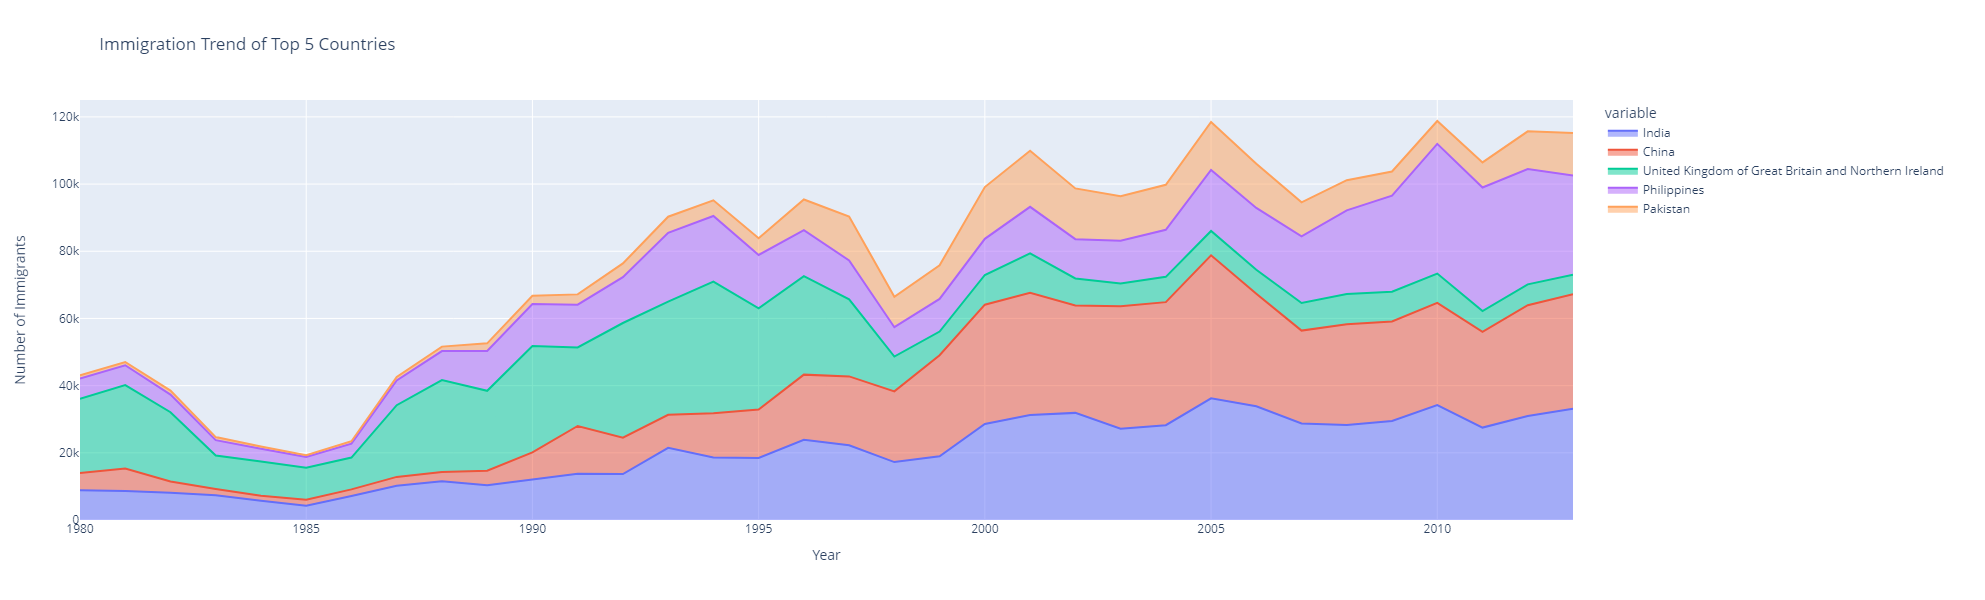

In [56]:
# Sort the dataframe by Total immigrants and select top 5
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5_plotly = df_can.head()

# Transpose the dataframe and select only the years for plotting
df_top5_plotly = df_top5_plotly[years].transpose()

# Change the index values to type integer for plotting
df_top5_plotly.index = df_top5_plotly.index.map(int)

# Create an area plot using Plotly
fig_area_plotly = px.area(df_top5_plotly, 
                          x=df_top5_plotly.index, 
                          y=df_top5_plotly.columns, 
                          title='Immigration Trend of Top 5 Countries',
                          labels={'value': 'Number of Immigrants', 'index': 'Year'})
fig_area_plotly.update_layout(width=1200, height=600)


fig_area_plotly

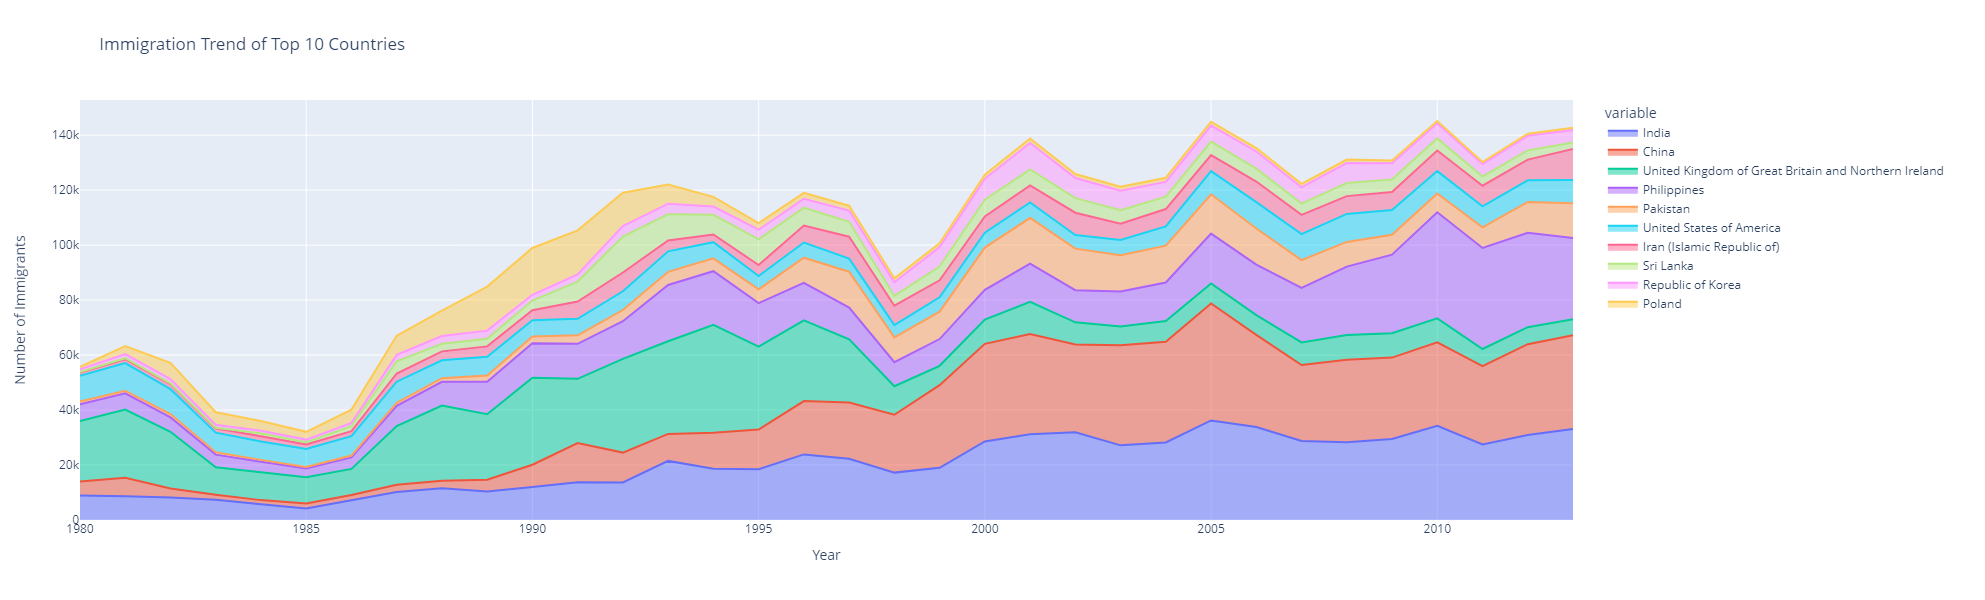

In [58]:
# Sort the dataframe by Total immigrants and select top 10
df_top10_plotly = df_can.head(10)

# Transpose the dataframe and select only the years for plotting
df_top10_plotly = df_top10_plotly[years].transpose()

# Change the index values to type integer for plotting
df_top10_plotly.index = df_top10_plotly.index.map(int)

# Create an area plot using Plotly for top 10 countries
fig_area_top10 = px.area(df_top10_plotly, 
                         x=df_top10_plotly.index, 
                         y=df_top10_plotly.columns, 
                         title='Immigration Trend of Top 10 Countries',
                         labels={'value': 'Number of Immigrants', 'index': 'Year'})
fig_area_top10.update_layout(width=1200, height=600)

fig_area_top10



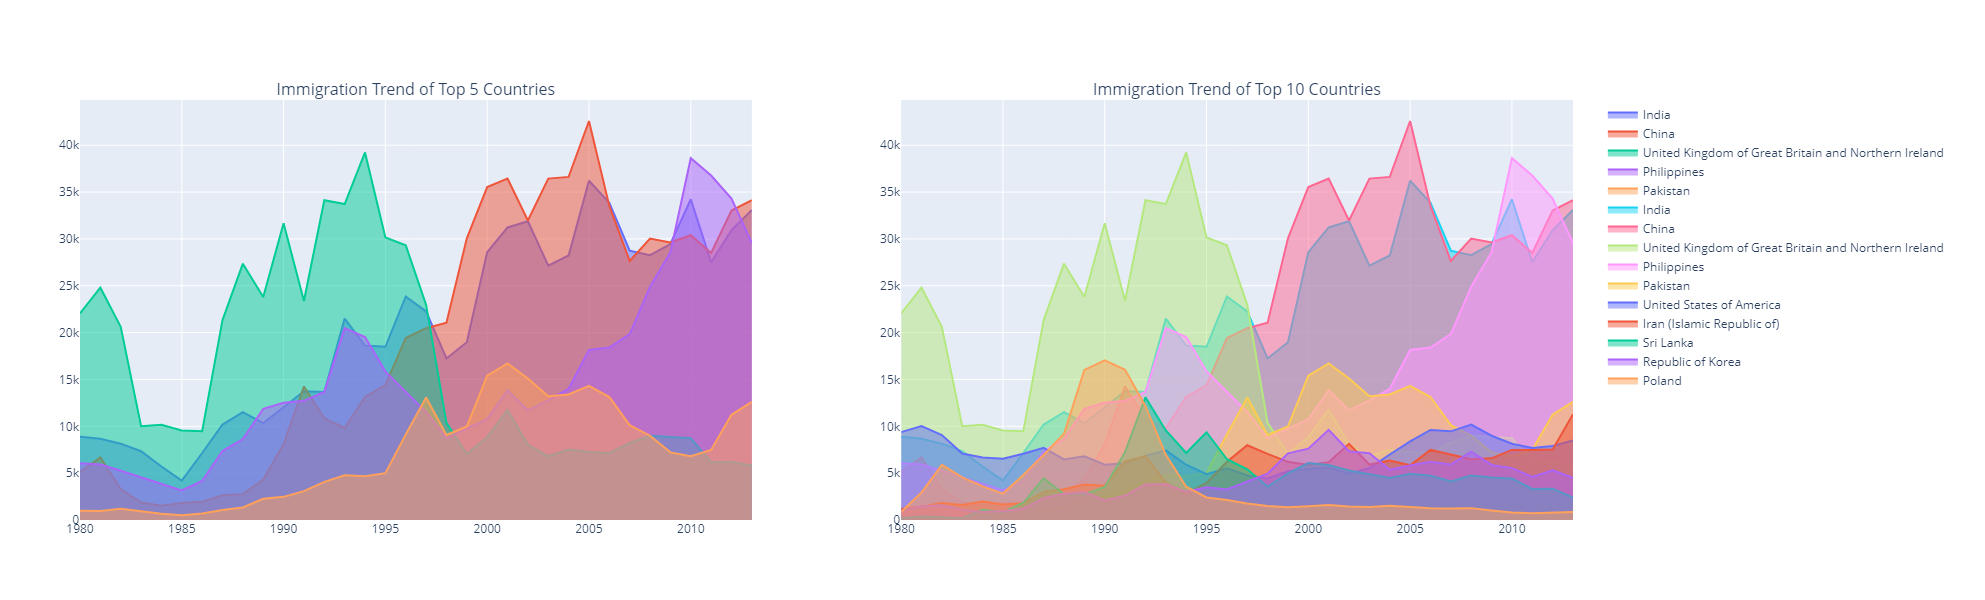

In [78]:
from plotly.subplots import make_subplots

# Create a subplot layout with two rows and one column
fig_subplots = make_subplots(rows=1, cols=2, 
                             subplot_titles=('Immigration Trend of Top 5 Countries', 
                                             'Immigration Trend of Top 10 Countries'))

# Add the area plots for the top 5 countries to the first subplot
for country in df_top5_plotly.columns:
    fig_subplots.add_trace(go.Scatter(x=df_top5_plotly.index,
                                      y=df_top5_plotly[country],
                                      mode='lines',
                                      fill='tozeroy',
                                      name=country,
                                     showlegend=True),
                           row=1, col=1)

# Add the area plots for the top 10 countries to the second subplot
for country in df_top10_plotly.columns:
    fig_subplots.add_trace(go.Scatter(x=df_top10_plotly.index,
                                      y=df_top10_plotly[country],
                                      mode='lines',
                                      fill='tozeroy',
                                      name=country,showlegend=True),
                           row=1, col=2)

# Update the layout
fig_subplots.update_layout(width=1700, height=600)

fig_subplots


For our next visualization, we'll display the Distribution of Immigrants by Development Status using a pie chart. This will provide an understanding of the proportion of immigrants coming from developed versus developing regions.

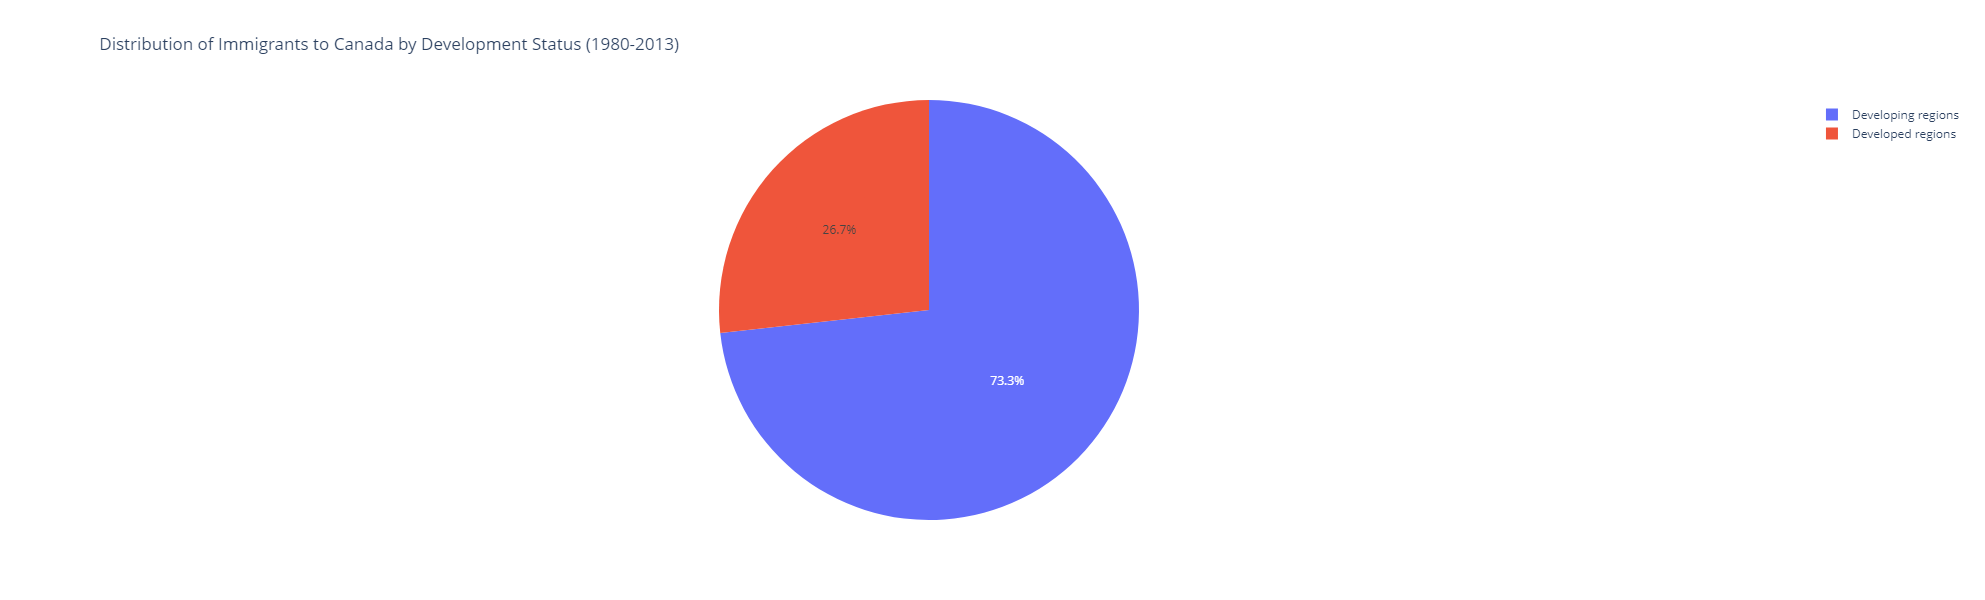

In [61]:
# Group data by DevName and sum the totals
df_devname = df_can.groupby('DevName').sum()['Total']

# Create a pie chart for distribution of immigrants by development status
fig_devname = px.pie(df_devname, 
                     names=df_devname.index, 
                     values=df_devname.values, 
                     title='Distribution of Immigrants to Canada by Development Status (1980-2013)')

fig_devname.update_layout(width=1200, height=600)
fig_devname

The distribution of immigrants to Canada by development status from 1980 to 2013 is:

Developed regions: 1,714,011 immigrants
Developing regions: 4,695,142 immigrants
It's evident that a larger number of immigrants to Canada come from developing regions compared to developed regions.

## More insights.

**Immigration Trend of Canada Over the Years**: We'll visualize the total number of immigrants to Canada from all countries over the years to see the overall trend.

**Immigration Distribution by Regions:**: We'll create a pie chart to visualize the proportion of immigrants from different regions of the world.

**Box Plot for Immigrants Over the Years:**: This will help us understand the spread, median, and outliers in the number of immigrants over the years.

**Heatmap of Immigrants Over the Years:**: This visualization will give us an idea of the concentration and patterns of immigration across years.


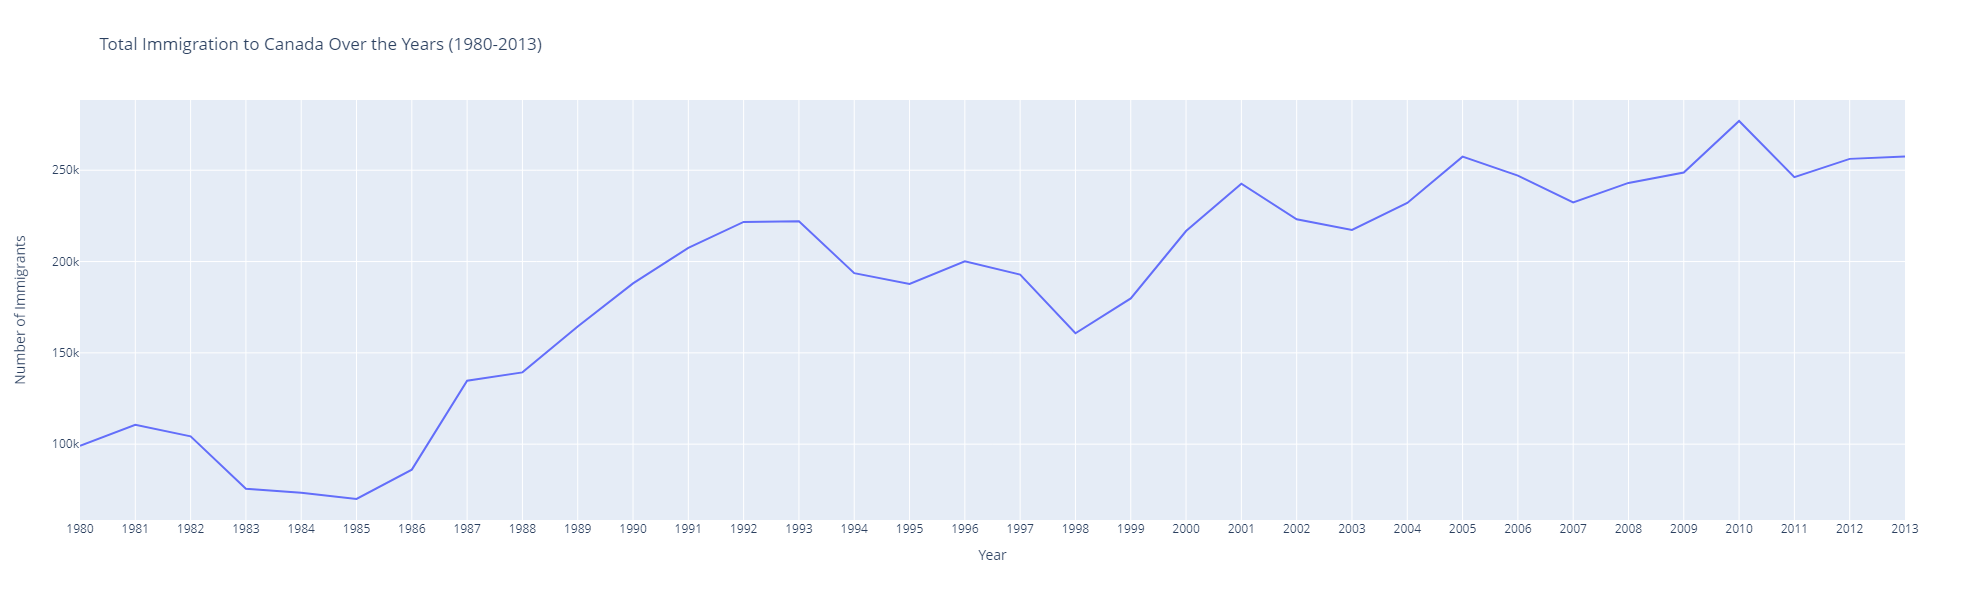

In [71]:
# Sum the number of immigrants for all countries over the years
df_total_immigration = df_can[years].sum(axis=0)

# Create a line chart for total immigration trend over the years
fig_total_immigration = px.line(df_total_immigration, 
                                x=df_total_immigration.index, 
                                y=df_total_immigration.values, 
                                labels={'y': 'Number of Immigrants', 'index': 'Year'},
                                title='Total Immigration to Canada Over the Years (1980-2013)')

fig_total_immigration.update_layout(width=1200, height=600)

fig_total_immigration

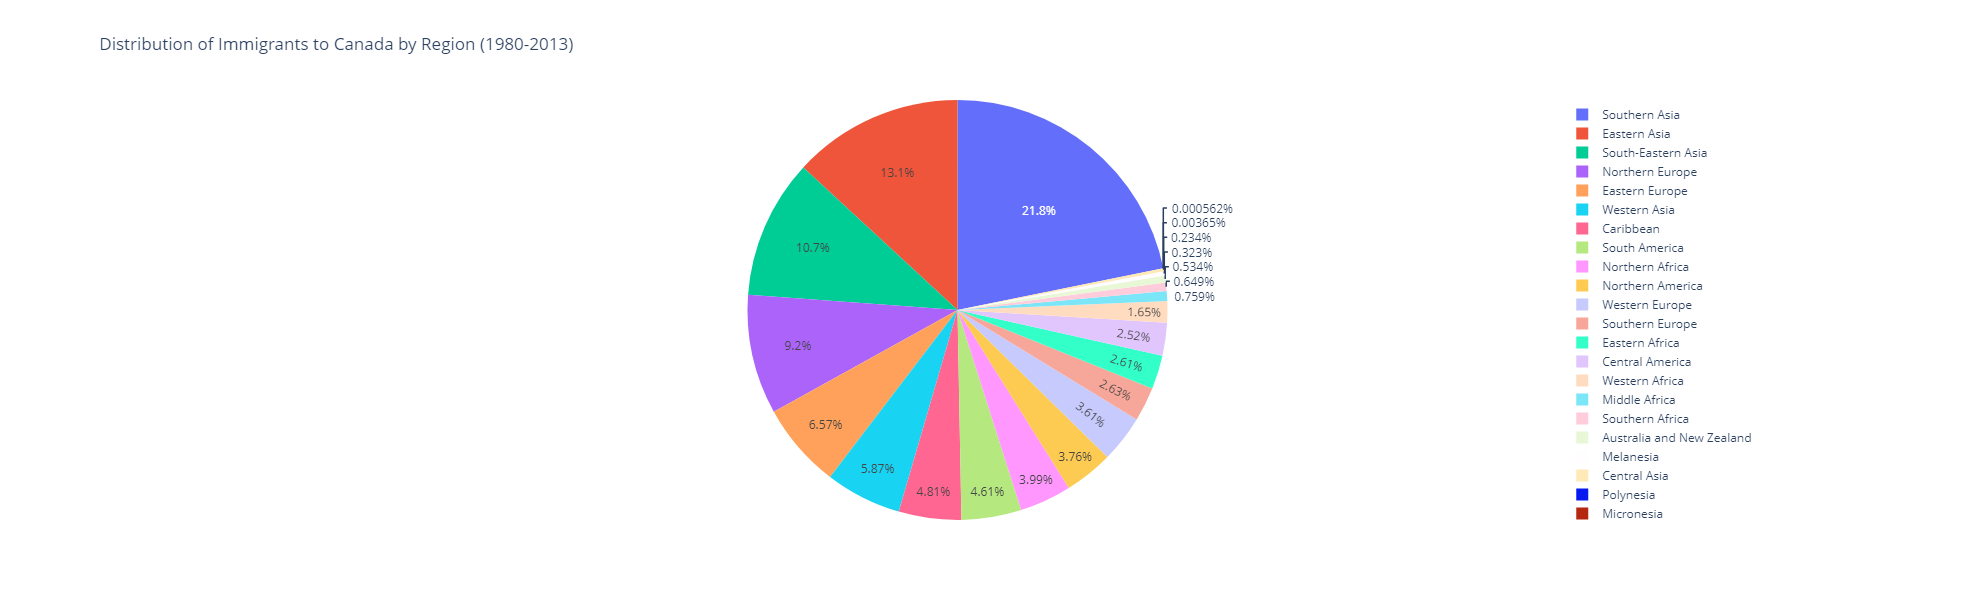

In [73]:
# Group data by Region and sum the totals
df_region = df_can.groupby('Region').sum()['Total']

# Create a pie chart for distribution of immigrants by region
fig_region = px.pie(df_region, 
                    names=df_region.index, 
                    values=df_region.values, 
                    title='Distribution of Immigrants to Canada by Region (1980-2013)')

fig_region.update_layout(width=1200, height=600)

fig_region


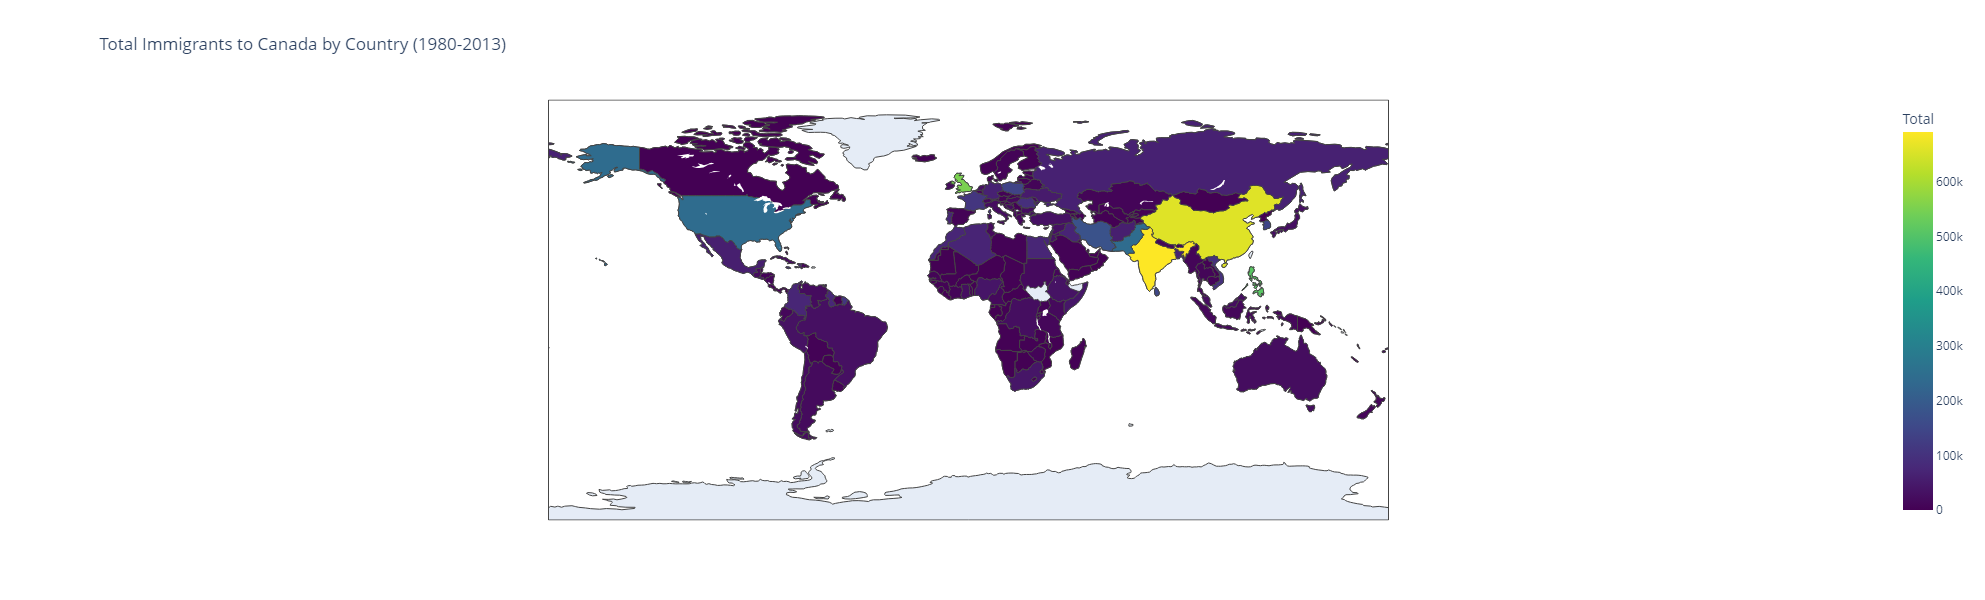

In [27]:
# Create a choropleth map for total immigrants by country over the entire period
fig_choropleth = px.choropleth(df_can, 
                               locations=df_can.index, 
                               locationmode='country names',
                               color='Total',
                               hover_name=df_can.index,
                               color_continuous_scale='Viridis',
                               title='Total Immigrants to Canada by Country (1980-2013)')
# Update layout to adjust figure size
fig_choropleth.update_layout(width=1000, height=600)

fig_choropleth

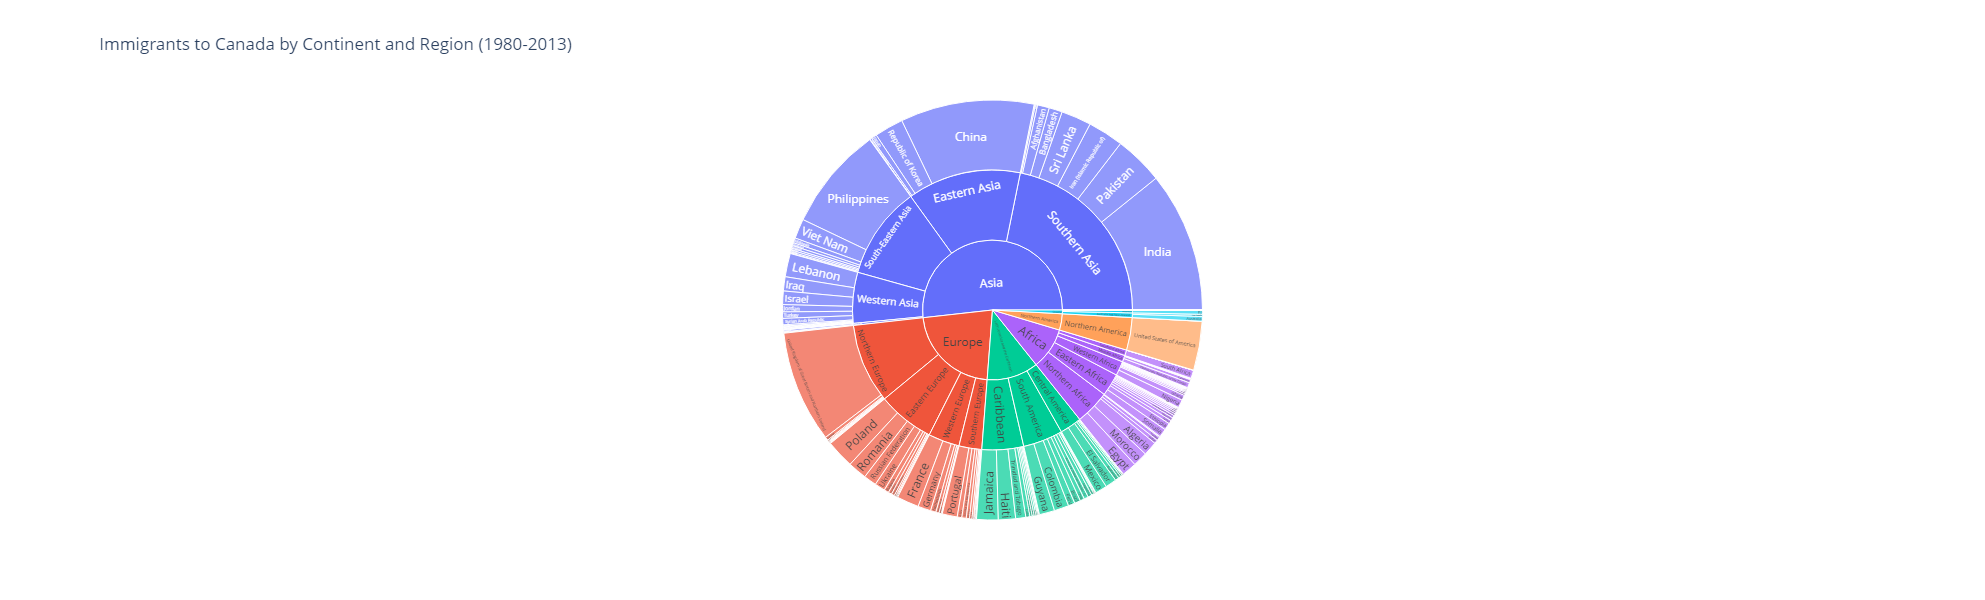

In [28]:
# Create a sunburst chart for immigrants by Continent and Region
fig_sunburst = px.sunburst(df_can.reset_index(), 
                           path=['Continent', 'Region', 'index'], 
                           values='Total',
                           title='Immigrants to Canada by Continent and Region (1980-2013)',
                           color_continuous_scale='Viridis')
fig_sunburst.update_layout(width=1000, height=600)

fig_sunburst

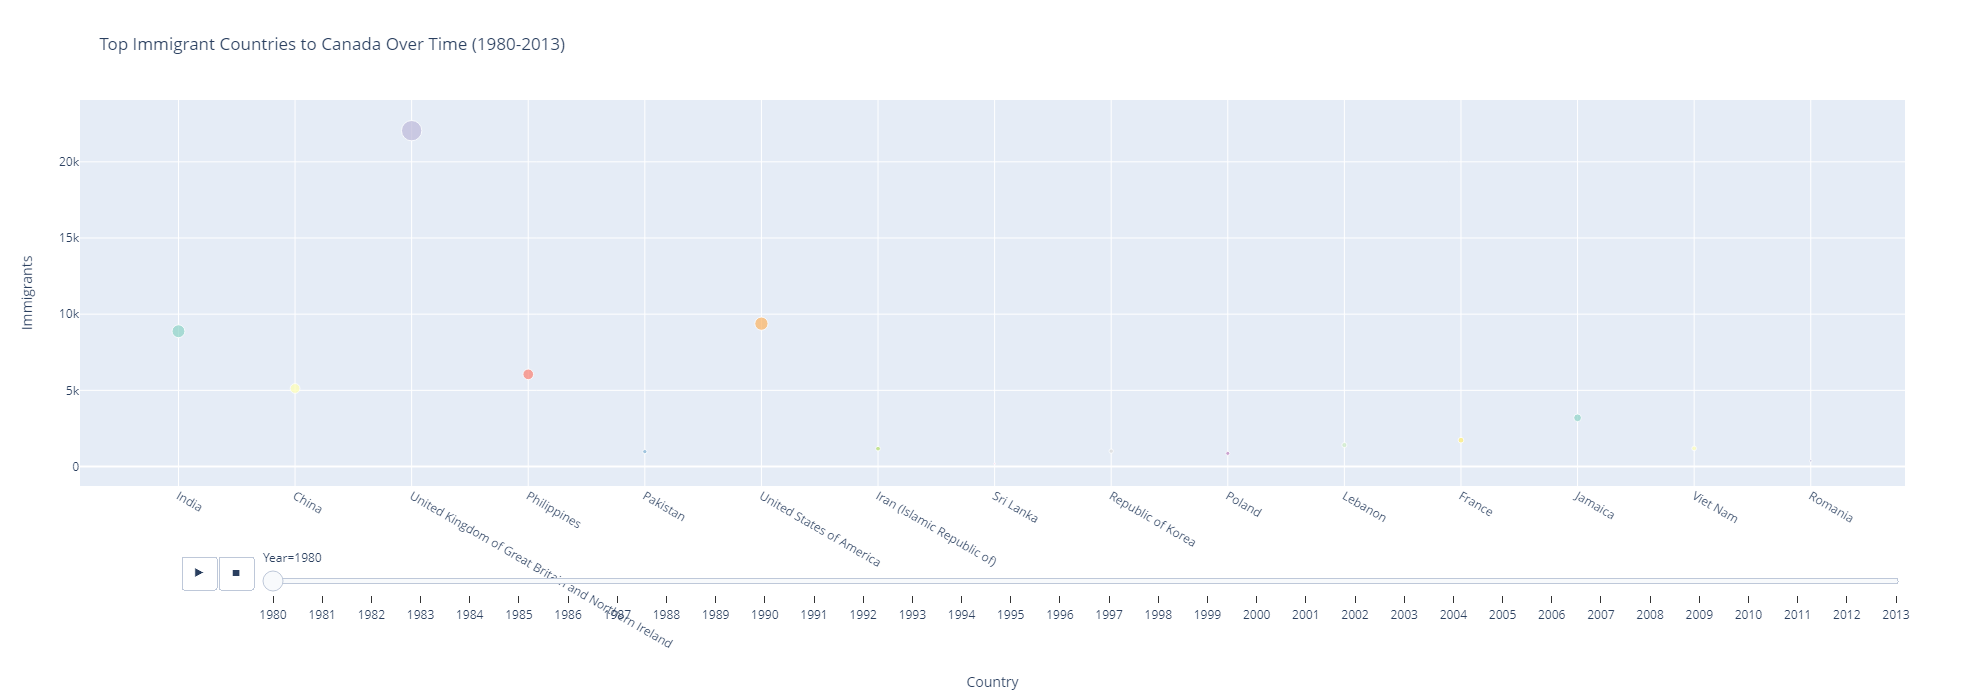

In [84]:
# Filter top 15 countries for better visualization
df_top15 = df_can.sort_values(by='Total', ascending=False).head(15)
# Creating the bubble plot for top countries over time, adjusting the size argument
fig_bubble = px.scatter(df_top15.reset_index().melt(id_vars='index', value_vars=years, var_name='Year', value_name='Immigrants'), 
                        x='index', 
                        y='Immigrants', 
                        size='Immigrants', 
                        animation_frame='Year', 
                        title='Top Immigrant Countries to Canada Over Time (1980-2013)',
                        labels={'index': 'Country'},
                        color='index',
                        color_discrete_sequence=px.colors.qualitative.Set3,
                        orientation='h')

# Adjust the layout
fig_bubble.update_layout(showlegend=False)
fig_bubble.update_layout(width=1000, height=700)
